## 6.5 Unsupervised Machine Learning: K-means Clustering, Silhouette Coefficient

## Index
[1. Import Libraries and Datasets](#1.-Import-Libraries-andDatasets)
<br>
[2. Data Cleaning](#2.-Data-Cleaning)
<br>
[3. Elbow Technique](#3.-Elbow-Technique)
<br>
[4. K-means Clustering](#4.-K-means-Clustering)
<br>
[5. K-means Aggregations](#5.-K-means-Aggregations)
<br>
[6. Silhouette Coefficient](#6.-Silhouette-Coefficient)

### 1. Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as cm
import matplotlib.pyplot as plt
import os
import sklearn
import pylab as pl 
import numpy as np

from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# import datasets

# create path for dataset 
path = r'C:\Users\pears\Desktop\CF\Achievement 6\datasets'

# create filepaths
filepath = os.path.join(path, '.pkl', 'only_nec.pkl')

# assign df name
df = pd.read_pickle(filepath)

### 2. Data Cleaning

In [4]:
# remove column limit of output 
pd.options.display.max_columns = None

# remove row limit of output 
pd.options.display.max_rows = None

In [5]:
df.head()

,Entity,Code,Continent,Region,Anxiety,Depressive,AHDI,F/F_A/D_YES,VComfortable,vs,F/F,nature,lifestyle,relationships,work,meds,prof,religious,life_ladder,social_support,life_expect,choice_freedom,corruption,pos,neg
0,Afghanistan,AFG,Asia,Southern Asia,5.0337,5.1315,0.1804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.662,0.491,53.25,0.427,0.954,0.435,0.371
1,Albania,ALB,Europe,Southern Europe,4.0993,2.6280,0.5165,28.00,25.49,-0.09,86.52499,88.64183,67.71693,54.1925,39.66084,40.89743,34.49906,36.1776,4.640,0.638,69.05,0.750,0.876,0.547,0.334
2,Algeria,DZA,Africa,Northern Africa,5.0529,4.3729,0.3229,20.88,31.64,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.249,0.807,66.20,0.437,0.700,0.555,0.289
3,American Samoa,ASM,Oceania,Polynesia,4.2545,2.7973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Europe,Southern Europe,6.0083,3.9744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(205, 25)

In [7]:
# choosing select columns for K-means model; omitting categorical columns
unsup = df[['Anxiety', 'Depressive', 'AHDI', 'VComfortable', 'vs', 'F/F', 'social_support']]

In [8]:
unsup.head()

,Anxiety,Depressive,AHDI,VComfortable,vs,F/F,social_support
0,5.0337,5.1315,0.1804,NaN,NaN,NaN,0.491
1,4.0993,2.6280,0.5165,25.49,-0.09,86.52499,0.638
2,5.0529,4.3729,0.3229,31.64,0.52,NaN,0.807
3,4.2545,2.7973,NaN,NaN,NaN,NaN,NaN
4,6.0083,3.9744,NaN,NaN,NaN,NaN,NaN


In [9]:
unsup.shape

(205, 7)

In [10]:
# drop all NaN as they are not allowed to run K-means model 
unsup_nonan = unsup.dropna()

In [11]:
unsup_nonan.shape

(96, 7)

### 3. Elbow Technique

In [12]:
# see how many clusters is optimal for this df by first suggesting a range of 1-10
num_cl = range(1, 10)

# define k-means clusters in the above range
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
# create rate of variation, or score, for each cluster size created above 
score = [kmeans[i].fit(unsup_nonan).score(unsup_nonan) for i in range(len(kmeans))] 

score

C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: K

[-22616.126846804942,
 -10902.608160353917,
 -7214.302573787205,
 -5682.075468948165,
 -4484.47982043865,
 -3720.4534954748474,
 -3080.3619695587977,
 -2679.257649672123,
 -2326.129483996306]

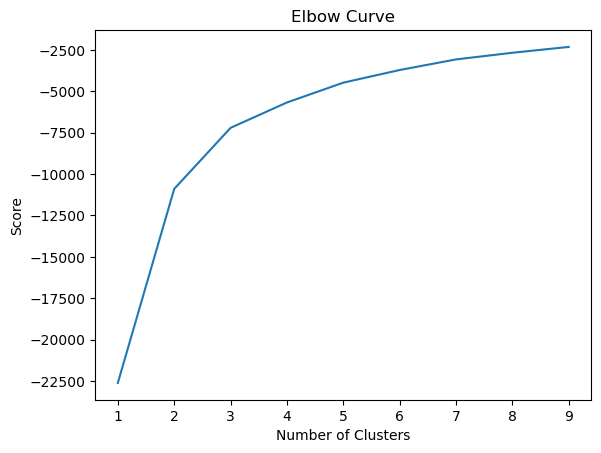

In [14]:
# plot elbow curve using PyLab

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Number of clusters = 3?? 

### 4. K-means Clustering

In [15]:
# create k-means object w 3 clusters

kmeans = KMeans(n_clusters = 3) 

In [16]:
reduced_data = unsup_nonan(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

TypeError: 'DataFrame' object is not callable

In [ ]:
# fit k-means object to data

kmeans.fit(unsup_nonan)

In [ ]:
# create column named 'clusters' in unsup_nonan to show cluster group assigned number 

unsup_nonan['clusters'] = kmeans.fit_predict(unsup_nonan)

In [ ]:
unsup_nonan.head()

In [ ]:
unsup_nonan['clusters'].value_counts()

In [ ]:
# plot clusters for 'social_support' and 'anxiety' variables

plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=unsup_nonan['social_support'], y=unsup_nonan['Anxiety'], hue=kmeans.labels_, s=50) 

ax.grid(False)
plt.xlabel('Level of social support')
plt.ylabel('Prevalence of anxiety disorder')
plt.show()

In [ ]:
# plot clusters for 'social_support' and 'depressive' variables

plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=unsup_nonan['social_support'], y=unsup_nonan['Depressive'], hue=kmeans.labels_, s=50) 

ax.grid(False)
plt.xlabel('Level of social support')
plt.ylabel('Prevalence of anxiety disorder')
plt.show()

In [ ]:
# plot clusters for 'VComfortable' and 'depressive' variables

plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=unsup_nonan['VComfortable'], y=unsup_nonan['Depressive'], hue=kmeans.labels_, s=50) 

ax.grid(False)
plt.xlabel('Very comfortable talking about anxiety/depression to friends/family')
plt.ylabel('Prevalence of depressive disorder')
plt.show()

In [ ]:
# plot clusters for 'VComfortable' and 'depressive' variables

plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=unsup_nonan['VComfortable'], y=unsup_nonan['Anxiety'], hue=kmeans.labels_, s=50) 

ax.grid(False)
plt.xlabel('Very comfortable talking about anxiety/depression to friends/family')
plt.ylabel('Prevalence of anxiety disorder')
plt.show()

### 5. K-means Aggregations

In [ ]:
unsup_nonan.loc[unsup_nonan['clusters'] == 2, 'clusters'] = '2'
unsup_nonan.loc[unsup_nonan['clusters'] == 1, 'clusters'] = '1'
unsup_nonan.loc[unsup_nonan['clusters'] == 0, 'clusters'] = '0'

I changed the newly labeled '2 dark purple', '1 purple' and '0 pink' back to numerical values bc I was getting errors when calculating the silouette scores below.

Should I have removed the 'clusters' column from the unsup_nonan dataframe before calculating the silouette scores below?

In [ ]:
unsup_nonan.groupby('clusters').agg({'Anxiety':['mean', 'median'], 'Depressive':['mean', 'median'], 'AHDI':['mean', 'median'], 'VComfortable':['mean', 'median'], 'vs':['mean', 'median'], 'F/F':['mean', 'median'], 'social_support':['mean', 'median']})

I initially tried using the df with all 21 variables (with categorical columns removed). The elbow test looked very similar to what it is now, having reduced the variables to 7. 

Because the elbow test came out more rounded and an optimal number was hard to distinguish, I initially had k=5. Then I reduced it to 3 to see if that would improve the clusters but there were not notable differences.

The clusters, when plotted on the scatterplot, looks random. The only pattern I saw was when I plotted "very comfortable talking about A/D to F/F" against "anxiety" and "depressive" respectively. 

### 6. Silhouette Coefficient

I looked up the below codes and worked out the errors. I'm not sure if they're correct.

In [ ]:
# Silouette coefficient for each K-mean model

# Range of models to test
cluster_range = [2, 3, 4, 5, 6]

# Create lists to store k-means and silhouette scores
silhouette_scores = []
kmeans_models = []

# Iterate through different cluster numbers
for n_clusters in cluster_range:
    kmeans_sc = KMeans(n_clusters=n_clusters)
    kmeans_sc.fit(unsup_nonan)
    
    # Predict cluster labels for each data point
    cluster_labels = kmeans_sc.predict(unsup_nonan)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(unsup_nonan, cluster_labels)
    
    # Append silhouette score and k-means model to lists
    silhouette_scores.append(silhouette_avg)
    kmeans_models.append(kmeans_sc)
    
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

In [ ]:
# Create a list to store K-mean models 
kmeans_models = []
for num_clusters in range(2, 7):
    kmeans_sc = KMeans(n_clusters=num_clusters)
    kmeans_sc.fit(unsup_nonan)
    kmeans_models.append(kmeans_sc)

# Create a list to store sizes of clusters for each K-mean model
cluster_sizes = []
for kmeans_sc in kmeans_models:
    
    # Predict cluster labels for each data point
    cluster_labels = kmeans_sc.predict(unsup_nonan)
    
    # Count the number of data points in each cluster
    unique, counts = np.unique(cluster_labels, return_counts=True)
    cluster_sizes.append(dict(zip(unique, counts)))

# Display the sizes of clusters for each K-means model
for k, sizes in enumerate(cluster_sizes, start=2):
    print(f'Clusters for k={k}: {sizes}')

The k-mean models with the highest scores are:
- 2 (0.51)
- 5 (0.41)

But looking at the cluster sizes, k=2 has a large difference (75, 21), as does k=5 (42, 24, 13, 9, 8). I'm reading that the best k-mean has both a high score and an even distribution of cluster size. 

Next up are: 
- 3 (0.40) with 47, 32, 17
- 4 (0.36) with 37, 27, 18, 14
- 6 (0.33) with 36, 18, 15, 10, 9, 8

...which all still have imbalanced cluster sizes...

### 7. Export Dataframe

In [ ]:
unsup_nonan.to_csv(os.path.join(path, '.csv', 'Tableau kmean cluster.csv'))